## Import Library

In [2]:
!pip install imblearn

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

from sklearn import tree
from sklearn import datasets
from sklearn.tree import plot_tree 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 

## Load dataset

In [4]:
df = pd.read_csv('1661917074959-WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

In [5]:
#Merubah TotalCharges col to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checking datatype
df['TotalCharges'].dtypes

dtype('float64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Checking untuk mengetahui missing values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Total Charges punya 11 missing values
# kita akan drop rows dengan missing data dan check untuk melihat missing values masih ada atau tidak

df= df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Droppinig customerID
# Mengganti 1/0 di 'seniorCitizen' dengan Yes/No
# Mengganti Yes/No pada target variable (Churn) dengan numeric 1/0

df.drop('customerID', axis=1, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'})
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


#### Terlihat 'Churn' sudah menjadi numerical dan kekosongan pada 'TotalCharges' telah dikecualikan dengan total data dari 7043 menjadi 7031

<AxesSubplot:>

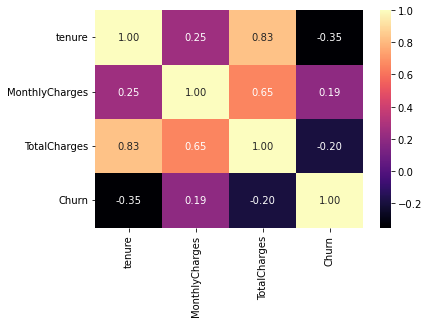

In [11]:
# melihat korelasi menggunakan heatmap untuk mengenali numerical variable pada the categorical variable (Churn as Target Variable)
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap ='magma',fmt='.2f')

#### Bisa dilihat 'TotalCharges' berkorelasi tinggi dengan 'tenure' dan 'MonthlyCharges'. karena itu, kita akan memindahkan 'TotalCharges' dari dataframe

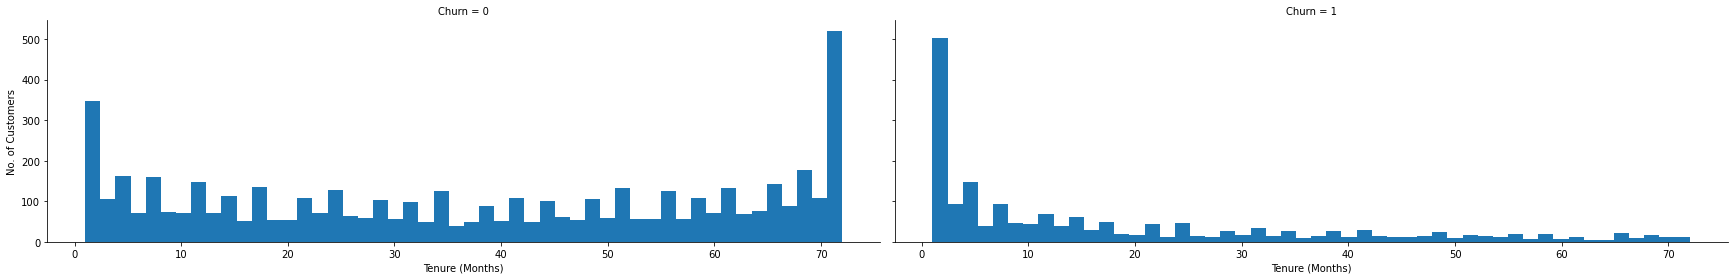

In [12]:
# Distribusi dari Tenure

tenure = sns.FacetGrid(data=df, col='Churn', height=4, aspect=3)
tenure.map(plt.hist, 'tenure', bins=50)

tenure.set(xlabel='Tenure (Months)', ylabel='No. of Customers')
plt.show()

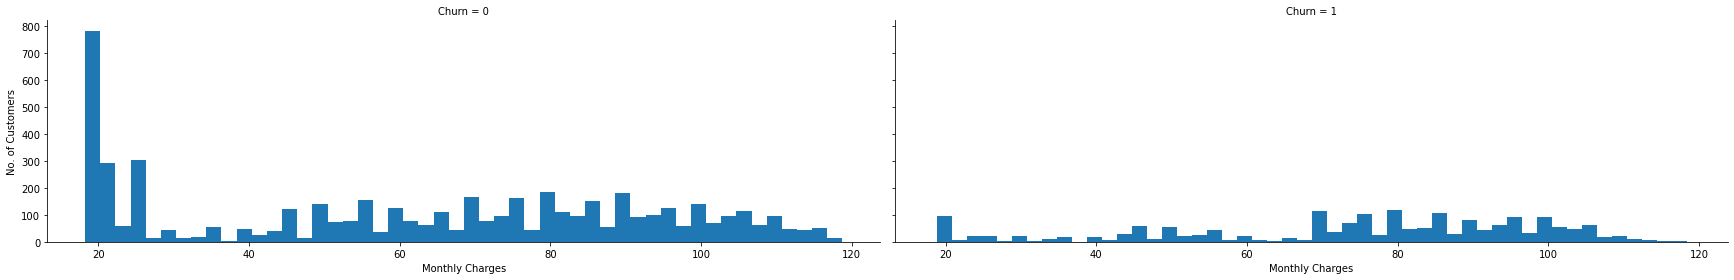

In [13]:
# Distribusi dari Monthly Charges

monthly = sns.FacetGrid(data=df, col='Churn', height=4, aspect=3)
monthly.map(plt.hist, 'MonthlyCharges', bins=50)

monthly.set(xlabel='Monthly Charges', ylabel='No. of Customers')
plt.show()

### Customer nampak lebih churn (berdampak) pada monthly charges yang tinggi

In [14]:
# Merubah tenure kedalam kelompok yang lebih kecil
#binning data menggunakan cut() method
bins = [0,6,12,18,24,36,48,60,72,84]
df['Tenure_grouped'] = pd.cut(df['tenure'], bins)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_grouped
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,"(0, 6]"
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,"(24, 36]"
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,"(0, 6]"
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,"(36, 48]"
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,"(0, 6]"


In [15]:
df['Tenure_grouped'].value_counts()

(0, 6]      1470
(60, 72]    1407
(24, 36]     832
(48, 60]     832
(36, 48]     762
(6, 12]      705
(12, 18]     548
(18, 24]     476
(72, 84]       0
Name: Tenure_grouped, dtype: int64

In [16]:
# Merubah categorical variables Menjadi dummy variables

df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,"Tenure_grouped_(6, 12]","Tenure_grouped_(12, 18]","Tenure_grouped_(18, 24]","Tenure_grouped_(24, 36]","Tenure_grouped_(36, 48]","Tenure_grouped_(48, 60]","Tenure_grouped_(60, 72]","Tenure_grouped_(72, 84]"
0,1,29.85,29.85,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
df_modeling = df_dummy
df_modeling.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,"Tenure_grouped_(6, 12]","Tenure_grouped_(12, 18]","Tenure_grouped_(18, 24]","Tenure_grouped_(24, 36]","Tenure_grouped_(36, 48]","Tenure_grouped_(48, 60]","Tenure_grouped_(60, 72]","Tenure_grouped_(72, 84]"
0,1,29.85,29.85,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


## Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

In [20]:
# Splitting data menjadi train dan test datasets
# Test will 30% of the orginal dataframe

y = df_modeling['Churn']
X = df_modeling.drop('Churn', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

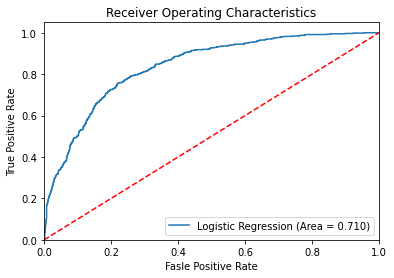

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_logreg = logreg.predict(X_test)

logreg_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.3f)' % logreg_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logreg = confusion_matrix(y_test,y_pred_logreg)
confusion_matrix_logreg

array([[1382,  167],
       [ 265,  296]])

In [24]:
from sklearn.metrics import classification_report
classify_logreg = classification_report(y_test, y_pred_logreg)
print(classify_logreg)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Kita akan membandingkan logistic regression model dengan yang lain
### 1. KNN
### 2. Decision Tree
### 3. Random Forest


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test) 

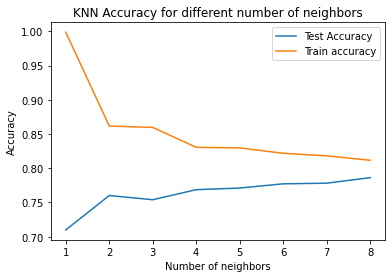

In [28]:
plt.title('KNN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Accuracy maximum for n = 8

In [29]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

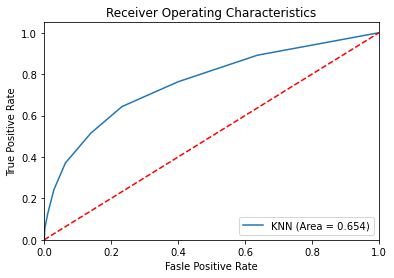

In [30]:
y_pred_knn = knn.predict(X_test)

knn_roc_auc = roc_auc_score(y_test,y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.3f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()


In [31]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[1451,   98],
       [ 353,  208]])

In [32]:
classify_knn = classification_report(y_test, y_pred_knn)
print(classify_knn)

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1549
           1       0.68      0.37      0.48       561

    accuracy                           0.79      2110
   macro avg       0.74      0.65      0.67      2110
weighted avg       0.77      0.79      0.76      2110



# Decission Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier()

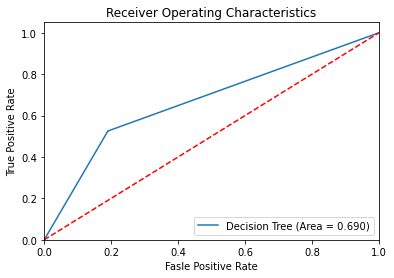

In [146]:
y_pred_dectree = dectree.predict(X_test)

dectree_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,dectree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.3f)' % dectree_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('DEC_ROC')
plt.show()

In [147]:
confusion_matrix_dectree = confusion_matrix(y_test,y_pred_dectree)
confusion_matrix_dectree

array([[1255,  294],
       [ 266,  295]])

In [148]:
classify_dectree = classification_report(y_test, y_pred_dectree)
print(classify_dectree)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.50      0.53      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.67      2110
weighted avg       0.74      0.73      0.74      2110



# Random Forest

In [34]:
ranfor = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

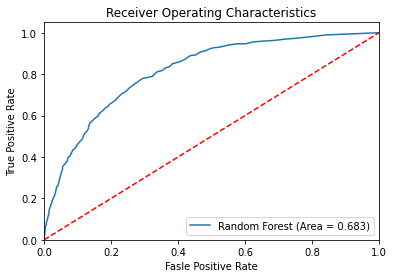

In [35]:
y_pred_ranfor = ranfor.predict(X_test)

ranfor_roc_auc = roc_auc_score(y_test,y_pred_ranfor)
fpr, tpr, thresholds = roc_curve(y_test,ranfor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (Area = %0.3f)' % ranfor_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [152]:
confusion_matrix_ranfor = confusion_matrix(y_test,y_pred_ranfor)
confusion_matrix_ranfor

array([[1384,  165],
       [ 300,  261]])

In [153]:
classify_ranfor = classification_report(y_test, y_pred_ranfor)
print(classify_ranfor)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



## Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [36]:
# Perbandingan 4 modeling

performance = {'Model': ['Logistic Regression', 'K Nearest Neighbors','Decission Tree', 'Random Forest'], 
               'Accuracy (%)'   : [80, 77,72, 78], 
               'Sensitivity (%)': [52, 48, 49, 47], 
               'Specificity (%)': [91, 87, 81, 89]
              }
perf = pd.DataFrame(data=performance)
perf

,Model,Accuracy (%),Sensitivity (%),Specificity (%)
0,Logistic Regression,80,52,91
1,K Nearest Neighbors,77,48,87
2,Decission Tree,72,49,81
3,Random Forest,78,47,89


### bisa dilihat bahwa model Logistic Regression Memiliki skor yang cukup tinggi dibandingkan ketiga model yang lain.